In [ ]:
import os
import re
import nltk
import requests
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
nltk.download("stopwords")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
books_df = pd.read_csv('Preprocessed_data.csv', sep=',', delimiter=None,header='infer', names=None,
            index_col=None, usecols=None, squeeze=False,
            engine=None)


In [ ]:
books = books_df

In [ ]:
books.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43933 entries, 0 to 43932
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           43933 non-null  int64  
 1   user_id              43933 non-null  int64  
 2   location             43933 non-null  object 
 3   age                  43933 non-null  float64
 4   isbn                 43933 non-null  object 
 5   rating               43933 non-null  int64  
 6   book_title           43933 non-null  object 
 7   book_author          43932 non-null  object 
 8   year_of_publication  43932 non-null  float64
 9   publisher            43932 non-null  object 
 10  img_s                43932 non-null  object 
 11  img_m                43932 non-null  object 
 12  img_l                43932 non-null  object 
 13  Summary              43932 non-null  object 
 14  Language             43932 non-null  object 
 15  Category             43932 non-null 

In [ ]:
books.isnull().sum()

Unnamed: 0                0
user_id                   0
location                  0
age                       0
isbn                      0
rating                    0
book_title                0
book_author               1
year_of_publication       1
publisher                 1
img_s                     1
img_m                     1
img_l                     1
Summary                   1
Language                  1
Category                  1
city                    348
state                   831
country                1468
dtype: int64

In [ ]:
books_df['Language'].unique()

array(['en', '9', 'de', 'fr', 'es', 'ca', nan], dtype=object)

In [ ]:
df = books.copy()
print("Rating  = ", pd.unique(df["rating"]))
print("Category    = ", pd.unique(df["Category"]))


Rating  =  [ 0  5  8  9  7  6 10  4  3  2  1]
Category    =  ["['Social Science']" "['Actresses']" "['1940-1949']" "['Medical']"
 "['Design']" "['Fiction']" "['History']" '9' "['Nature']" "['Humor']"
 "['Cooking']" "['Reference']" "['Juvenile Fiction']"
 "['Canadian fiction']" "['Health & Fitness']" "['FICTION']"
 "['Control (Psychology)']" "['Cholistan Desert (Pakistan)']"
 "['Science']" "['Political ethics']" "['Conduct of life']" "['Horses']"
 "['Political Science']" "['Brothers']"
 "['Baggins, Frodo (Fictitious character)']"
 "['Biography & Autobiography']" "['Business & Economics']"
 "['Americans']" "['Infanticide']" "['Cabala']" "['Literary Criticism']"
 "['Self-Help']" "['American fiction']" "['Humorous stories']"
 "['Diary fiction']" "['Religion']" "['German language']"
 "['Bloom, Leopold (Fictitious character)']"
 "['Detective and mystery stories']"
 "['Gargoyles (Fictitious characters)']" "['Oglala Indians']"
 "['England']" "['Michigan']" "['Foster mothers']" "['Families']"
 

In [ ]:
df = books.copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.drop(columns = ['Unnamed: 0','location','isbn',
                   'img_s','img_m','city','age',
                   'state','Language','country',
                   'year_of_publication'],axis=1,inplace = True)

df.drop(index=df[df['Category'] == '9'].index, inplace=True) #remove 9 in category

df.drop(index=df[df['rating'] == 0].index, inplace=True) #remove 0 in rating

df['Category'] = df['Category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

df.head(2)

,user_id,rating,book_title,book_author,publisher,img_l,Summary,Category
1,8,5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",Actresses
4,67544,8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",Actresses


In [ ]:
print("Category    = ", pd.unique(df["Category"]))

Category    =  ['Actresses' '1940 1949' 'Medical' 'Fiction' 'History' 'Nature' 'Humor'
 'Cooking' 'Reference' 'Juvenile Fiction' 'Canadian fiction'
 'Health Fitness' 'FICTION' 'Control Psychology'
 'Cholistan Desert Pakistan' 'Science' 'Conduct of life' 'Horses'
 'Political Science' 'Brothers' 'Baggins Frodo Fictitious character'
 'Biography Autobiography' 'Business Economics' 'Americans' 'Infanticide'
 'Cabala' 'Literary Criticism' 'Self Help' 'American fiction'
 'Humorous stories' 'Diary fiction' 'Religion' 'Oglala Indians' 'England'
 'Social Science' 'Michigan' 'Foster mothers' 'Adolescence'
 'Dune Imaginary place' 'Animals' 'Great Britain' 'London England' 'Music'
 'Mars Planet' 'Fairy tales' 'Children s stories' 'Jews'
 'Fantasy fiction English' 'Arctic regions' 'Poetry'
 'Comics Graphic Novels' 'Comic books strips etc'
 'Fantasy comic books strips etc' 'Aerospace engineers' 'Greek poetry'
 'Juvenile Nonfiction' 'Gay men' 'Orphans' 'Family problems' 'Computers'
 'American literatu

In [ ]:
num_ratings = df.groupby('book_title', as_index=False)['rating'].count()

num_ratings = num_ratings.rename(columns={'rating': 'num_of_ratings'})

most_ratings = num_ratings.sort_values(
    by='num_of_ratings', ascending=False).head(10)

Text(0.5, 0, 'Number of Ratings')

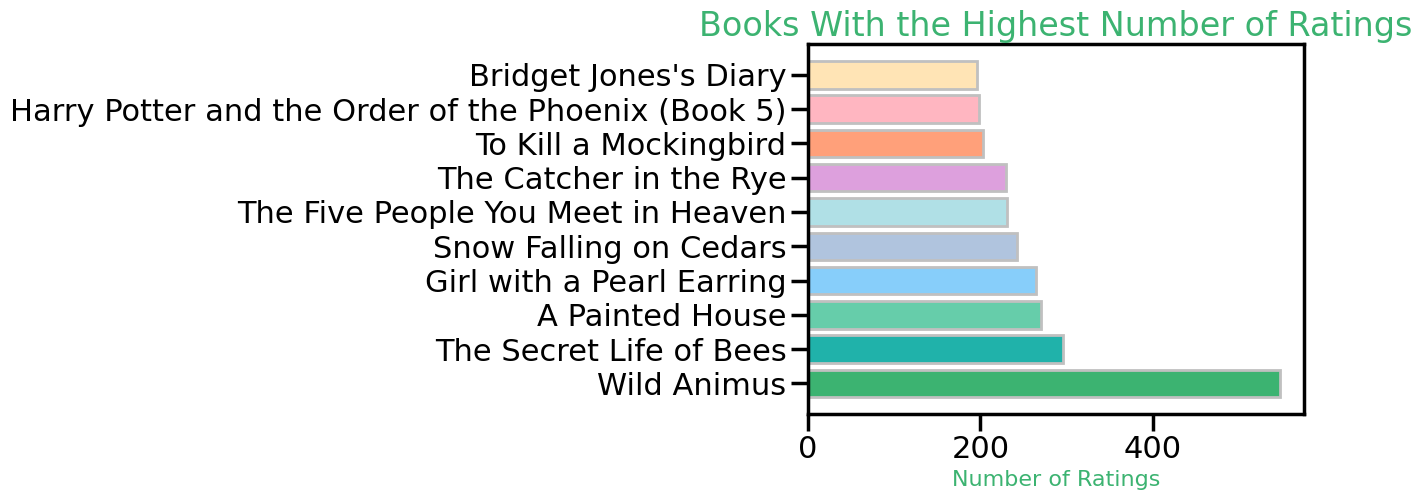

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')

my_color_pal = [
    'MediumSeaGreen',
    'LightSeaGreen',
    'MediumAquaMarine',
    'LightSkyBlue',
    'LightSteelblue',
    'PowderBlue',
    'Plum',
    'LightSalmon',
    'LightPink',
    'Moccasin',
]

y = most_ratings['book_title']
width = most_ratings['num_of_ratings']
most_viz = plt.barh(y, width, color=my_color_pal, edgecolor='silver')
plt.title('Books With the Highest Number of Ratings',
          fontsize=24, color='MediumSeaGreen')
plt.xlabel('Number of Ratings', fontsize=16, color='MediumSeaGreen')

In [ ]:
avg_ratings = df.groupby('book_title', as_index=False)['rating'].mean()

avg_ratings = avg_ratings.rename(columns={'rating': 'avg_rating'})

avg_ratings.sort_values(by='avg_rating', ascending=False).head(10)

,book_title,avg_rating
293,"The Oneprince (The Redaemian Chronicles, Book 1)",10.0
208,Prescription for Terror,10.0
133,If I'd Known Then What I Know Now: Why Not Lea...,10.0
30,Astral Travel for Beginners (For Beginners),10.0
122,"His Only Desire (Double Exposure) (Intrigue, 627)",10.0
331,Thursday Next in the Well Of Lost Plots (Thurs...,10.0
275,The Harmony Illustrated Encyclopedia of Countr...,10.0
343,Watch Over Me (Rocky Mountain Rescue) (Harleq...,10.0
321,The Very Persistent Gappers of Frip,10.0
71,Desert Notes/River Notes,10.0


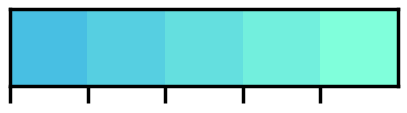

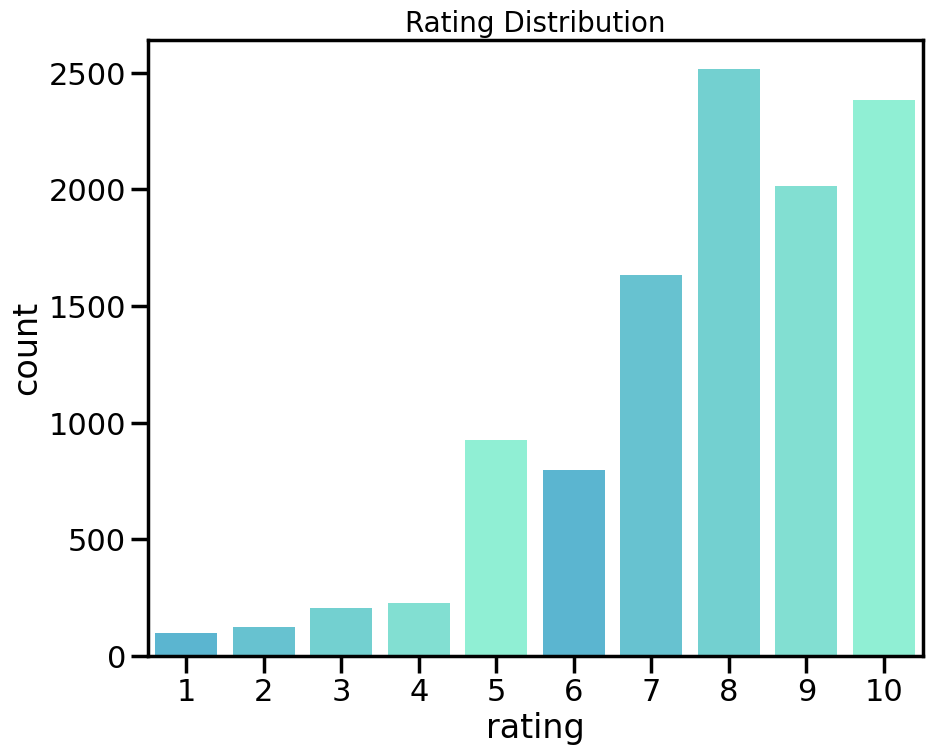

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import requests

from PIL import Image as im
from wordcloud import WordCloud,STOPWORDS
from IPython.core.display import Image

custom_colors = ['#48bfe3','#56cfe1','#64dfdf','#72efdd','#80ffdb']
customPalette = sns.color_palette(custom_colors)
sns.palplot(sns.color_palette(custom_colors),size=1)

# sns.set_context("poster")

plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution',size=20)
plt.show()

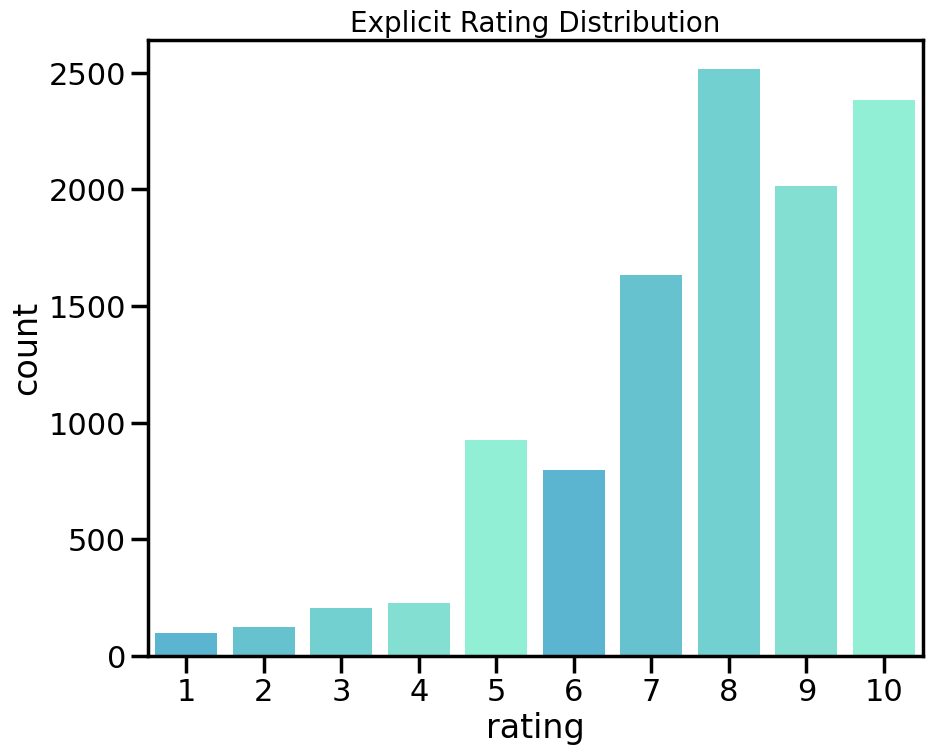

In [ ]:
df_v=df[['rating']].copy()
df_v.dtypes
df_v = df_v[df_v.rating != 0]
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df_v,palette=customPalette)
plt.title('Explicit Rating Distribution',size=20)
plt.show()

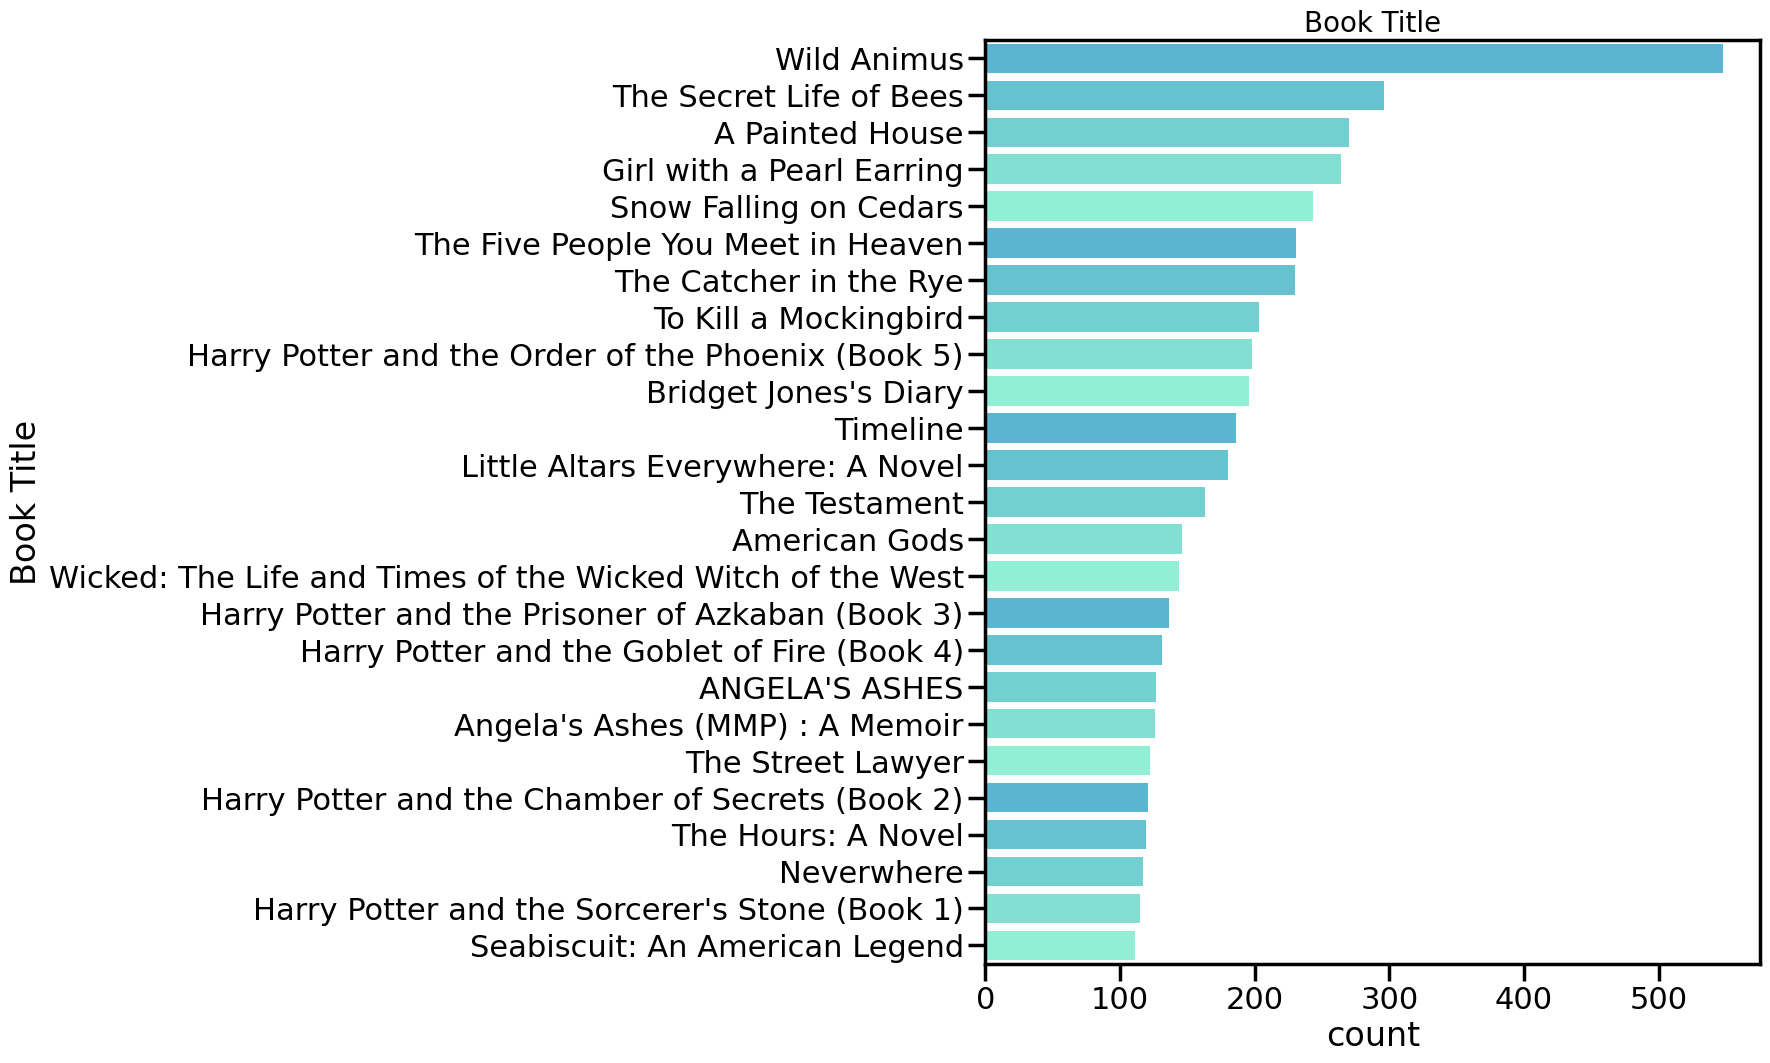

In [ ]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(25).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v,palette=customPalette)
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

barplot(df,'book_title','Book Title')

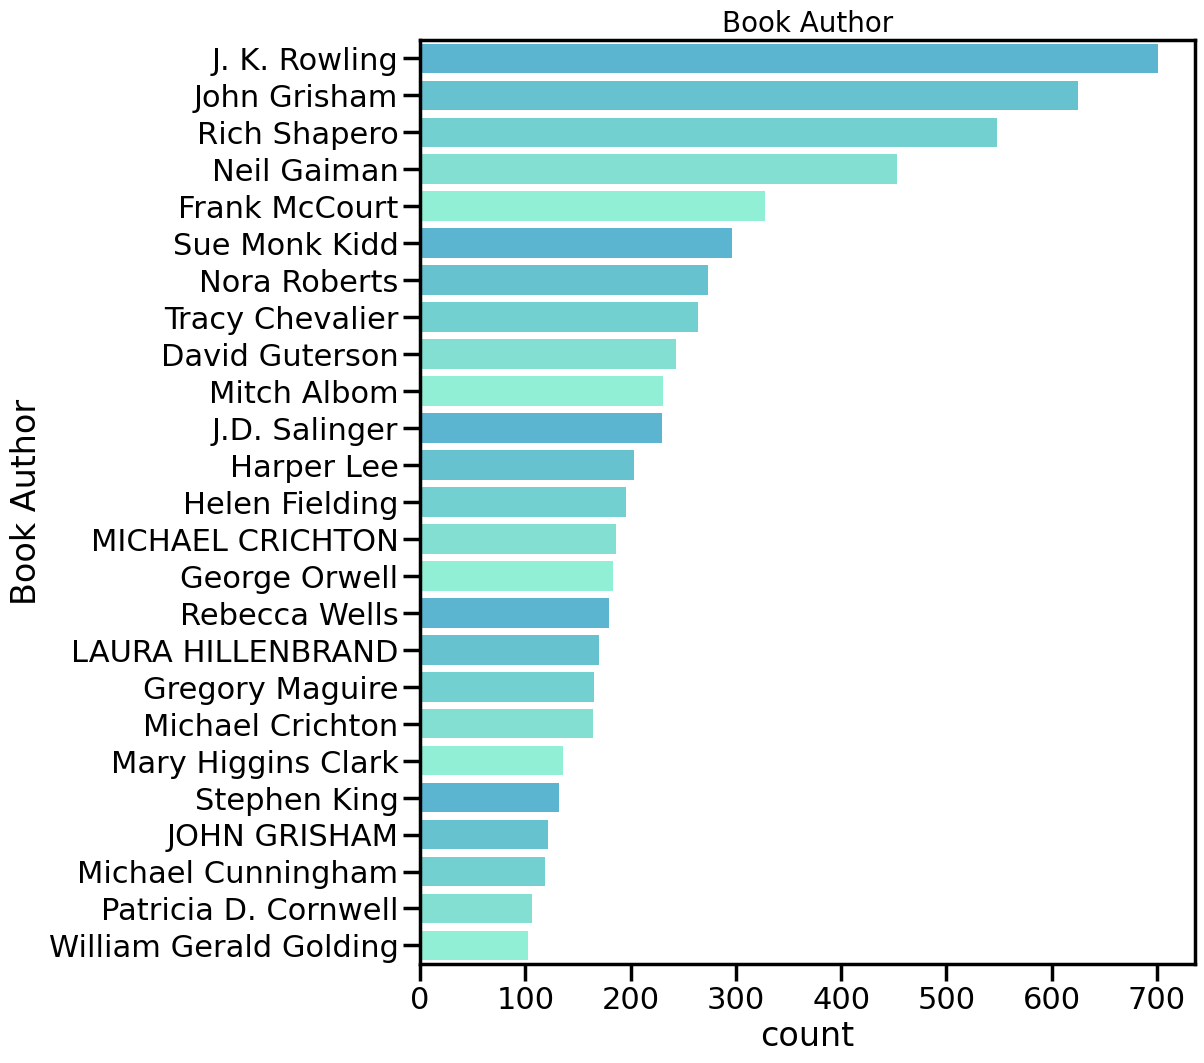

In [ ]:
barplot(df,'book_author','Book Author')

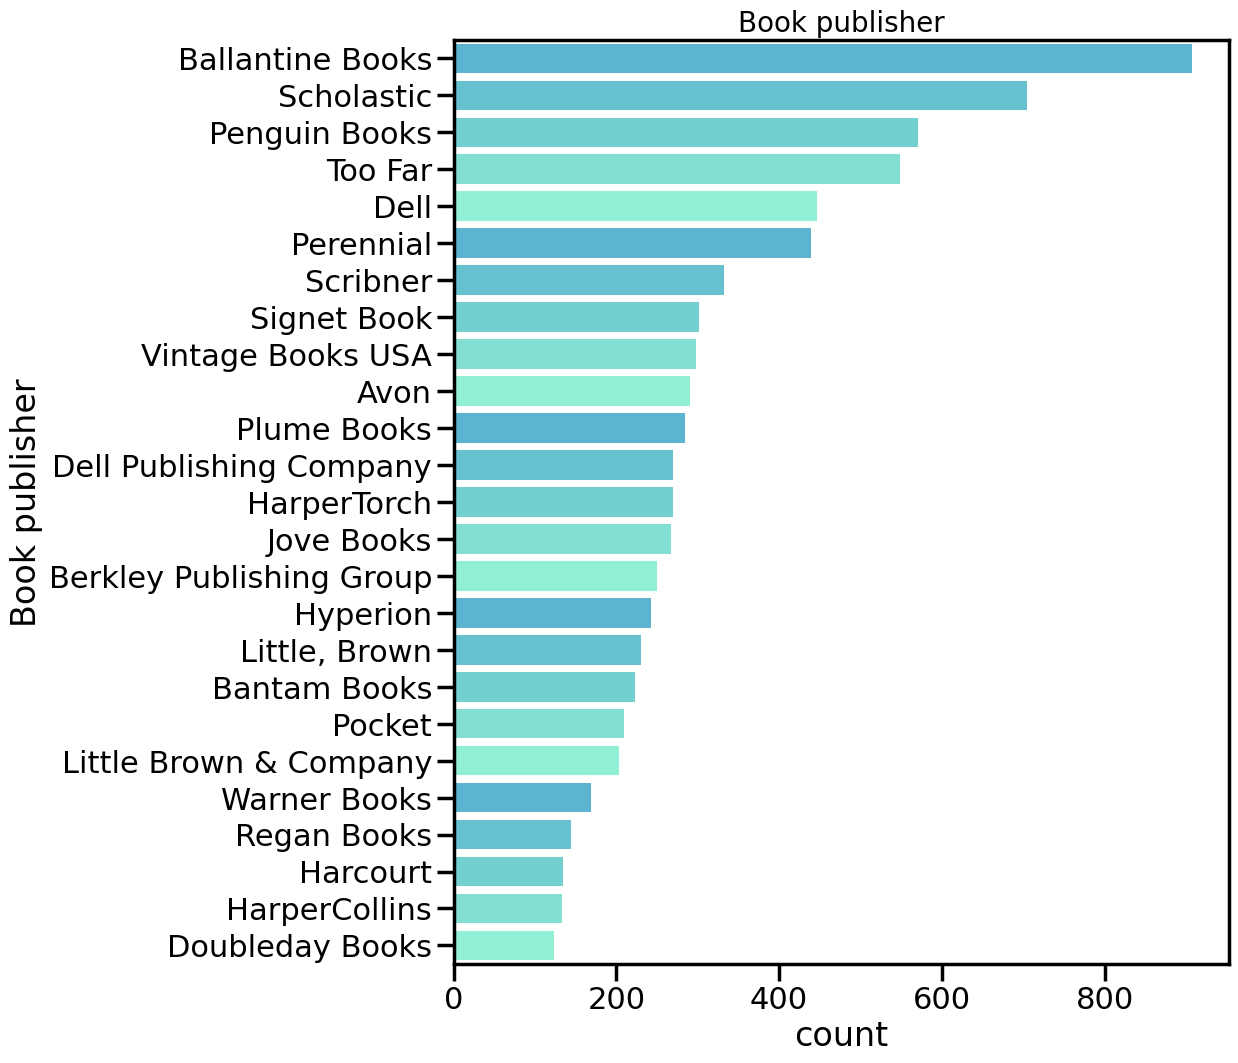

In [ ]:
barplot(df,'publisher','Book publisher')

In [ ]:
def item_based_recommender(book_title):

    book_title = str(book_title)
    if book_title in df['book_title'].values:

        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 180].index
        common_books = df[~df['book_title'].isin(rare_books)]

        if book_title in rare_books:

            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')

        else:
            user_book_df = common_books.pivot_table(index=['user_id'],
                                                    columns=['book_title'],
                                                    values='rating')

            book = user_book_df[book_title]
            recom_data = pd.DataFrame(user_book_df.corrwith(book). \
                                      sort_values(ascending=False)).reset_index(drop=False)

            if book_title in [book for book in recom_data['book_title']]:
                recom_data = recom_data.drop(recom_data[recom_data['book_title'] == book_title].index[0])

            low_rating = []
            for i in recom_data['book_title']:
                if df[df['book_title'] == i]['rating'].mean() < 5:
                    low_rating.append(i)

            if recom_data.shape[0] - len(low_rating) > 5:
                recom_data = recom_data[~recom_data['book_title'].isin(low_rating)]

            recom_data = recom_data[0:5]
            recom_data.columns = ['book_title','corr']


            print('You may also like these books')
            print('{}'.format(recom_data['book_title']),'\n')


    else:
        print('Cant find book in dataset, please check spelling')

In [ ]:
item_based_recommender('Fahrenheit 451')

There are no recommendations for this book
Try: 

The Catcher in the Rye 

Harry Potter and the Order of the Phoenix (Book 5) 



In [ ]:
item_based_recommender('The Street Lawyer')

There are no recommendations for this book
Try: 

The Five People You Meet in Heaven 

The Secret Life of Bees 



In [ ]:
item_based_recommender('Divine Secrets of the Ya-Ya Sisterhood: A Novel')

Cant find book in dataset, please check spelling


In [ ]:

item_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

You may also like these books
1                     Timeline
2       Snow Falling on Cedars
3      The Secret Life of Bees
4              A Painted House
5    Girl with a Pearl Earring
Name: book_title, dtype: object 



In [ ]:
def content_based_recommender(book_title):

    book_title = str(book_title)
    if book_title in df['book_title'].values:
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 100].index
        common_books = df[~df['book_title'].isin(rare_books)]

        if book_title in rare_books:

            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')

        else:

            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            target_cols = ['book_title','book_author','publisher','Category']
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],
                                      reverse=True)[1:6]

            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())


            print('You may also like these books')
            for i in range(len(books)):

               print(books[i])

    else:

        print('Cant find book in dataset, please check spelling')

In [ ]:
content_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

You may also like these books
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Wicked: The Life and Times of the Wicked Witch of the West


In [ ]:
content_based_recommender('The Street Lawyer')

You may also like these books
The Testament
A Painted House
The Catcher in the Rye
Harry Potter and the Order of the Phoenix (Book 5)
Wicked: The Life and Times of the Wicked Witch of the West


In [ ]:
import nltk
nltk.download('punkt')
def content_based_recommender2(book_title):

    book_title = str(book_title)
    if book_title in df['book_title'].values:
        rating_counts = pd.DataFrame(df['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 100].index
        common_books = df[~df['book_title'].isin(rare_books)]

        if book_title in rare_books:

            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')

        else:
            common_books = common_books.drop_duplicates(subset=['book_title'])
            common_books.reset_index(inplace= True)
            common_books['index'] = [i for i in range(common_books.shape[0])]

            summary_filtered = []
            for i in common_books['Summary']:

                i = re.sub("[^a-zA-Z]"," ",i).lower()
                i = nltk.word_tokenize(i)
                i = [word for word in i if not word in set(stopwords.words("english"))]
                i = " ".join(i)
                summary_filtered.append(i)

            common_books['Summary'] = summary_filtered
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['Summary'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books,key=lambda x:x[1],reverse=True)[1:6]

            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())


            print('You may also like these books')
            for i in range(len(books)):

                print(books[i])

    else:

        print('Cant find book in dataset, please check spelling')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
content_based_recommender2('The Street Lawyer')

You may also like these books
American Gods
The Testament
Wild Animus
Timeline
To Kill a Mockingbird


In [ ]:
item_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

You may also like these books
1                     Timeline
2       Snow Falling on Cedars
3      The Secret Life of Bees
4              A Painted House
5    Girl with a Pearl Earring
Name: book_title, dtype: object 



In [ ]:
content_based_recommender2('Harry Potter and the Order of the Phoenix (Book 5)')

You may also like these books
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Chamber of Secrets (Book 2)
Timeline


In [ ]:
content_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')

You may also like these books
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Wicked: The Life and Times of the Wicked Witch of the West
